 # Lecture9 : Simple Normal Regression  
 
 ## Instructor: Dr. Hu Chuan-Peng 

## Intro: 线性模型  

> ⭐从lec9开始，我们将重点介绍贝叶斯模型和统计分析方法的结合  

在lec9中，我们关注一个简单的线性模型  

* 假设在某公司中，每月的工资由固定工资和奖金组成，而影响奖金数高低的因素之一则是员工的业务数。  

* 在这个例子中，我们可以将每月的奖金数设为$Y$，业务数设为$X$，那么我们可以得到一串数据：  

$$  
\left\lbrace (Y_1,X_1), (Y_2,X_2),...,(Y_n,X_n) \right\rbrace  
$$  

* 我们可以使用线性模型来描述$Y$与$X$的关系，常见地，我们会将二者的关系写为：  

$$  
Y_i = \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
$$  

*($\beta_0$为截距，$\beta_1$为斜率，$\epsilon$为残差)*  
 

### Normal linear regression  

> ⭐我们也可以换一种方式来表达线性模型  

* 预测值$\mu_i$(即直线上的点)可以写为：$\mu_i = \beta_0 + \beta_1 X_i\;\;\;(1)$  

* 从图上可以看到预测值和实际值之间存在出入，实际值会在预测值附近波动  

* 那么实际值可以看作服从以$\mu_i$为均值，标准差为$\sigma$的正态分布，即：$Y_i \sim N(\mu_i, \sigma^2)\;\;\;(2)$  


![Image Name](https://cdn.kesci.com/upload/s3k1vv2eub.png?imageView2/0/w/960/h/960)  

*(改编自：https://saylordotorg.github.io/text_introductory-statistics/s14-03-modelling-linear-relationships.html)*

**Normal data model**  

将公式(1)(2)合并起来，则有：  

$$  
Y_i | \beta_0, \beta_1, \sigma \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
$$  
* 并且有如下假设：  

    1. 独立观测假设:每个观测值$Y_i$是相互独立的，即一个观测的值不受其他观测的影响  

    2. 线性关系假设: 预测值$\mu_i$和自变量$X_i$之间可以用线性关系来描述，即：$\mu_i = \beta_0 + \beta_1 X_i$  

    3. 方差同质性假设： 在任意自变量的取值下，观测值$Y_i$都会以$\mu_i$为中心，同样的标准差$\sigma$呈正态分布变化（$\sigma$ is consistent）

## 定义先验  

* 在这个模型中，存在着两个数据变量：$Y$，$X$ ，而变量间的关系则由三个未知的参数$\beta_0，\beta_1，\sigma$决定  

* 在贝叶斯模型的框架下，我们需要为未知的参数指定先验  

> 在指定先验之前，我们对参数有以下前提假设(assumptions):  
>    * $\beta_0，\beta_1，\sigma$ 之间相互独立的  

* 因此，先验可以指定为：  

$$  
Y_i \sim N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
$$  

$$  
\beta_0    \sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   \sim N\left(m_1, s_1^2 \right) \\  
\sigma \sim \text{Exp}(l)  
$$  

*注：$\sigma$服从指数分布，可以规定其值恒为正数*  

* $m_0，s_0，m_1，s_1$为超参数  

    * 我们需要根据我们对$\beta_0$和$\beta_1$的先验理解来选择超参数的范围  

    * 比如，$\beta_0$反映了业务数每增加1件，奖金增加的数量；$\beta_1$反映了业务数为0时，奖金数的值

**指定超参数**  

* 这里，我们根据先前的经验对超参数进行了定义  

$$  
\begin{equation}  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(-2000, 1000^2 \right)  \\  
                    & & \beta_1  & \sim N\left(100, 40^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.0008)  .\\  
\end{array}  
\end{equation}  
$$  

* 可视化指定的先验：  

![Image Name](https://cdn.kesci.com/upload/s3ja8gf8aq.png?imageView2/0/w/960/h/960)

## 数据  

* 可视化具体的数据情况  
    
    * 横轴为业务数，纵轴为奖金

In [1]:
import pandas as pd
df = pd.read_csv('./data/salary.csv')

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/home/mw/input/47144714/salary.csv')
sns.regplot(x="business", y="salary", data=df)
sns.despine()

<Figure size 640x480 with 1 Axes>

## 后验分布  

### 模型定义  

现在，我们可以结合数据与先验，为参数$(\beta_0, \beta_1, \sigma)$生成后验模型  

* 在lec7中我们已经知道，当后验分布过于复杂时，可以使用MCMC来近似后验分布  

    * 我们使用pymc来完成采样过程  


在这之前，我们需要对先验与似然进行定义，以下是我们需要定义的参数  

* > $Y_i {\sim} N\left(\mu_i, \sigma^2\right)$  

* > $\beta_{0}   \sim N\left(-2000, 1000^2 \right)$  

* > $\beta_1   \sim N\left(100, 40^2 \right)$  

* > $\mu_i = \beta_0 + \beta_1X_i$  

* > $\sigma   \sim \text{Exp}(0.0008)$  


In [2]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with pm.Model() as linear_model:

    beta_0 = pm.Normal("beta_0", mu=-2000, sigma=1000)          #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=100, sigma=40)              #定义beta_1
    sigma = pm.Exponential("sigma", 0.0008)                     #定义sigma

    x = pm.Data("x",df.business, mutable=False)                 #x是我们的自变量业务数

    mu = beta_0 + beta_1 * x                                    #定义mu，讲自变量与先验结合

    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df.salary)     #定义似然：预测值y符合N(mu, sigma)分布
                                                                                #通过 observed 传入我们收集到的实际数据y

### 先验预测检验(Prior Predictive Check)  


我们可以通过**先验预测检验**来初步判断先验的设定是否合理。  

* 在先验中随机抽取50组$\beta_0, \beta_1$值  
* 生成假数据自变量X，  
* 生成50条 $\beta_0 + \beta_1 X$, 观察其中的预测值是否处在合理的范围内

In [4]:
with linear_model:
    prior_pred = pm.sample_prior_predictive(samples=50, random_seed=84735)

Sampling: [beta_0, beta_1, sigma, y_est]


In [5]:
# 查看先验预测的抽取结果，可以发现结果储存在prior中
prior_pred

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [7]:
import xarray as xr

#在范围45-90内生成100个值，这里用xr.DataArray，是为了匹配数据类型
x_sim = xr.DataArray(np.linspace(45,90,100))                           

#先验抽取的结果存储在prior_pred.prior中，将其提取出来，并代入公式
y_sim = prior_pred.prior["beta_0"] + prior_pred.prior["beta_1"] * x_sim

#将y_sim的数据形状，为了画图
y_sim_re = y_sim.stack(sample=("chain", "draw"))

print("x形状:", np.shape(x_sim))
print("y形状(改变之前):",np.shape(y_sim))
print("y形状(改变之后):",np.shape(y_sim_re))

plt.plot(x_sim, y_sim_re, c="k", alpha=0.4)
sns.despine()


x形状: (100,)
y形状(改变之前): (1, 50, 100)
y形状(改变之后): (100, 50)


<Figure size 640x480 with 1 Axes>

### 后验模拟  

1. 接下来我们使用`pm.sample()`进行mcmc采样  

* 我们指定了4条马尔科夫链，保留的采样数为5000，对于每一个参数，在每条链上都有5000个采样结果  

    * $\left\lbrace \beta_0^{(1)}, \beta_0^{(2)}, \ldots, \beta_0^{(5000)} \right\rbrace$  

    * $\left\lbrace \beta_1^{(1)}, \beta_1^{(2)}, \ldots, \beta_1^{(5000)} \right\rbrace$  
    
    * $\left\lbrace \sigma_1^{(1)}, \sigma_1^{(2)}, \ldots, \sigma_1^{(5000)} \right\rbrace$  

2. 在采样结束之后，使用`az.plot_trace()`查看后验分布

In [8]:
with linear_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=5000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 89 seconds.


In [9]:
az.plot_trace(trace, figsize=(15,10),compact=False)

array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

<Figure size 1500x1000 with 6 Axes>

## 解释后验  

* 我们共得到20000对$\beta_0$和$\beta_1$值，可以通过`az.summary()`总结参数的基本信息

In [10]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,-2141.976,336.118,-2791.159,-1525.189,4.242,3.000,6279.0,7030.0,1.0
beta_1,81.949,4.848,72.838,91.065,0.061,0.043,6319.0,7286.0,1.0
sigma,1283.701,40.947,1209.681,1363.232,0.417,0.296,9681.0,8799.0,1.0


* 我们可以使用均值来理解生成的后验分布，通过上表我们知道  
	*  $\beta_0$= -2147.93 *(业务数为0时的奖金数，意义不大在此不考虑)*  
	*  $\beta_1$ = 82.03  
	*  我们可以将其解释为，业务数每增加1件，奖金数增加82.03元  

* 但从上表我们也知道参数的后验分布存在不确定性，参数均值生成的回归线只是其中之一  
	* 那么我们可以通过20000对参数值 生成20000条回归线

In [38]:
np.shape(trace.observed_data["y_est"])
np.shape(trace.constant_data["x"])
np.shape(trace.posterior["y_model"])
np.shape(df.business)
np.shape(df.salary)
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [31]:
# 导入自变量：业务数
x_value = xr.DataArray(df.business)

# 20000对参数与自变量进行组合，生成了20000条回归线
trace.posterior["y_model"] = trace.posterior["beta_0"] + trace.posterior["beta_1"] * x_value

#绘制实际数据分布，与回归线结果
az.plot_lm(idata=trace, 
           y=df.salary,
           x=df.business,
           y_model = "y_model",
           figsize=(15,10),
           textsize=15,
           grid=False)

# 设置坐标轴标题、字体大小
plt.xlabel('business', fontsize=16)  
plt.ylabel('salary', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
sns.despine()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 4) + inhomogeneous part.


![Image Name](https://cdn.kesci.com/upload/s3k7tyn6yi.png?imageView2/0/w/960/h/960)  


## 后验预测分布  

> 回归模型的参数除了可以帮助我们理解自变量与因变量的关系，还可以帮助我们做出预测  

❓预测问题如：小a本月完成的业务数为75，则小a本月的奖金可能是多少  

* 若我们以参数的后验均值($\beta_0 = -2147.93$, $\beta_1=82.03$ )进行预测  

$$  
-2147.93 + 82.03 * 75 =  4004.32  
$$  

* 但在lec8中我们知道后验预测中存在 采样变异和参数变异  

    * 在这个例子中，采样变异指的是业务数为75的员工并不总是会得到相同的奖金  
    
    * 而参数变异指的是，后验分布并没有指定唯一的参数  

* 在lec8中，我们知道，可以通过遍历所有参数组合下，所有事件发生可能性的求和平均来生成后验预测分布  
$$  
f\left(y_{\text{new}} | \vec{y}\right) = \int\int\int f\left(y_{new} | \beta_0,\beta_1,\sigma\right) f(\beta_0,\beta_1,\sigma|\vec{y}) d\beta_0 d\beta_1 d\sigma .  
$$  

😥但这也太抽象了...  


### 通过MCMC采样值理解后验预测分布  


* 通过MCMC采样，三个参数各获得了20000个采样值$\left(\beta_0^{(i)},\beta_1^{(i)},\sigma^{(i)}\right)$  

* 当X = 75时，每一组参数值都可以指定一个预测值$Y$可能符合的正态分布，我们可以从该正态分布中抽取一个预测值$Y_{new}$  

>    以i = 1 和 i = 20 的情况为例  

$$  
Y_{\text{new}}^{(i)} | \; \sim \; N\left(\mu^{(i)}, \left(\sigma^{(i)}\right)^2\right) \;\; \text{ with } \;\; \mu^{(i)} = \beta_0^{(i)} + \beta_1^{(i)} \cdot 75.  
$$  


![Image Name](https://cdn.kesci.com/upload/s3k3u2azj4.png?imageView2/0/w/960/h/960)  


**使用代码模拟单次后验预测**  

* 我们有20000组参数值，就能得到20000个预测值$Y$可能符合的正态分布，并抽取出20000个预测值$Y_{new}$  

* 这20000个预测值$Y_{new}$就构成了X = 75时，$Y$的后验预测分布  

$$  
\left[  
\begin{array}{lll}  
\beta_0^{(1)} & \beta_1^{(1)} & \sigma^{(1)} \\  
\beta_0^{(2)} & \beta_1^{(2)} & \sigma^{(2)} \\  
\vdots & \vdots & \vdots \\  
\beta_0^{(20000)} & \beta_1^{(20000)} & \sigma^{(20000)} \\  
\end{array}  
\right]  
\;\; \longrightarrow \;\;  
\left[  
\begin{array}{l}  
Y_{\text{new}}^{(1)} \\  
Y_{\text{new}}^{(2)} \\  
\vdots \\  
Y_{\text{new}}^{(20000)} \\  
\end{array}  
\right]  
$$  

* 我们先用代码来模拟单次完整的抽取过程

In [32]:
# 采样得到的参数后验分布都储存在 trace.posterior中，我们进行一些提取操作
# 将每个参数的20000次采样结果存储在数据框中
pos_sample = trace.posterior.stack(sample=("chain", "draw"))

df_pos_sample = pd.DataFrame({"beta_0": pos_sample["beta_0"].values,
                              "beta_1": pos_sample["beta_1"].values,
                              "sigma": pos_sample["sigma"].values})


In [34]:
mu_i = df_pos_sample.beta_0[0] + df_pos_sample.beta_1[0] * 75           #抽取第一组参数组合，生成正态分布的均值
np.random.seed(84735)
np.random.normal(loc = mu_i,                                            #从正态分布中随机抽取一个值，作为预测值
                scale= df_pos_sample.sigma[0], 
                size=1)

array([4519.466632])

**使用代码模拟多次后验预测**  

* 通过上述四行代码，我们已经进行了一次完整的后验预测  

* 我们可以写一个循环，重复这个过程20000次

In [35]:
# 生成两个空列，用来储存每一次生成的均值mu，和每一次抽取的预测值y_new
df_pos_sample['mu'] = np.nan
df_pos_sample['y_new'] = np.nan

# 将之前的操作重复20000次
for i in range(len(df_pos_sample)):
    mu_i = df_pos_sample.beta_0[i] + df_pos_sample.beta_1[i] * 75
    df_pos_sample["mu"][i] = mu_i
    df_pos_sample["y_new"][i] = np.random.normal(loc = mu_i,
                                            scale= df_pos_sample.sigma[i],
                                            size=1)

In [36]:
df_pos_sample

,beta_0,beta_1,sigma,mu,y_new
0,-1504.716476,71.204137,1318.239810,3835.593802,3416.456639
1,-1648.131929,74.222083,1277.538384,3918.524272,5088.616103
2,-2197.990697,82.665612,1300.700761,4001.930226,5026.440921
3,-2030.436206,80.345291,1228.882666,3995.460656,3577.331066
4,-2044.285218,80.147166,1228.699293,3966.752215,5983.222900
...,...,...,...,...,...
19995,-1957.623242,79.791700,1224.770933,4026.754289,5377.491809
19996,-2061.736356,79.940959,1230.799968,3933.835598,3593.246887
19997,-2373.220112,83.691274,1355.635778,3903.625412,3944.669750
19998,-2594.388002,90.014274,1273.011681,4156.682555,4515.617842


**绘制后验预测分布**  

根据刚刚生成的数据，我们可以分别绘制出 $\mu$ 与 $Y_{new}$ 的后验预测分布图

In [37]:
#新建画布
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)        

#在第一个画布中绘制出生成的mu的分布
sns.kdeplot(data=df_pos_sample,                                                
            x="mu", 
            color="black",
            ax=axs[0])

axs[0].set_xlim(0, 7500)

#在第二个画布中绘制出生成的y_new的分布
sns.kdeplot(data=df_pos_sample,                                                 
            x="y_new", 
            color="black",
            ax=axs[1])

fig.suptitle('Posterior predictive distribution(X=75)', fontsize=16)
sns.despine()

<Figure size 1500x500 with 2 Axes>

从上图可以看到， $Y_{new}$ 分布的不确定性远大于 $\mu$ 分布的不确定性  

同样可以画出二者95%的可信区间  

![Image Name](https://cdn.kesci.com/upload/s3k4s5j1c6.png?imageView2/0/w/960/h/960)

### 使用pymc生成后验预测分布

In [80]:
with linear_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [y_est]


<Axes: xlabel='y_est / y_est'>

c:\Users\92845\miniconda3\envs\pymc_env\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\92845\miniconda3\envs\pymc_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


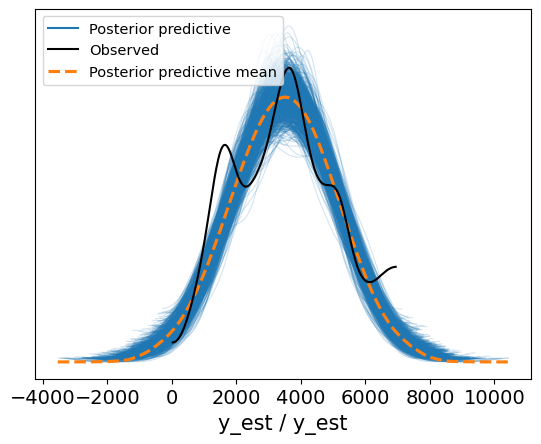

In [84]:
az.plot_ppc(trace, num_pp_samples=1000)

## 使用bambi进行模型定义

In [2]:
import bambi as bmb

#定义先验并传入模型中
intercept_prior = bmb.Prior("Normal", mu=-2000, sigma=1000)     #对应beta_0
business_prior = bmb.Prior("Normal", mu=100, sigma=40)          #对应beta_1
sigma_prior = bmb.Prior("Exponential", lam = 0.0008)            #对应sigma


priors = {"Intercept": intercept_prior, 
          "business": business_prior,
          "sigma": sigma_prior}

#定义关系式，传入数据
model = bmb.Model('salary ~ business', 
                  data=df,
                  priors=priors,
                  dropna=True)
#总结对模型的设置
model

       Formula: salary ~ business
        Family: gaussian
          Link: mu = identity
  Observations: 500
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: -2000.0, sigma: 1000.0)
            business ~ Normal(mu: 100.0, sigma: 40.0)
        
        Auxiliary parameters
            sigma ~ Exponential(lam: 0.0008)

In [111]:
# 采样
results = model.fit(draws=5000, 
                    tune=5000,
                    chains=4,
                    random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [salary_sigma, Intercept, business]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 96 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'business'}>,
        <Axes: title={'center': 'business'}>],
       [<Axes: title={'center': 'salary_sigma'}>,
        <Axes: title={'center': 'salary_sigma'}>]], dtype=object)

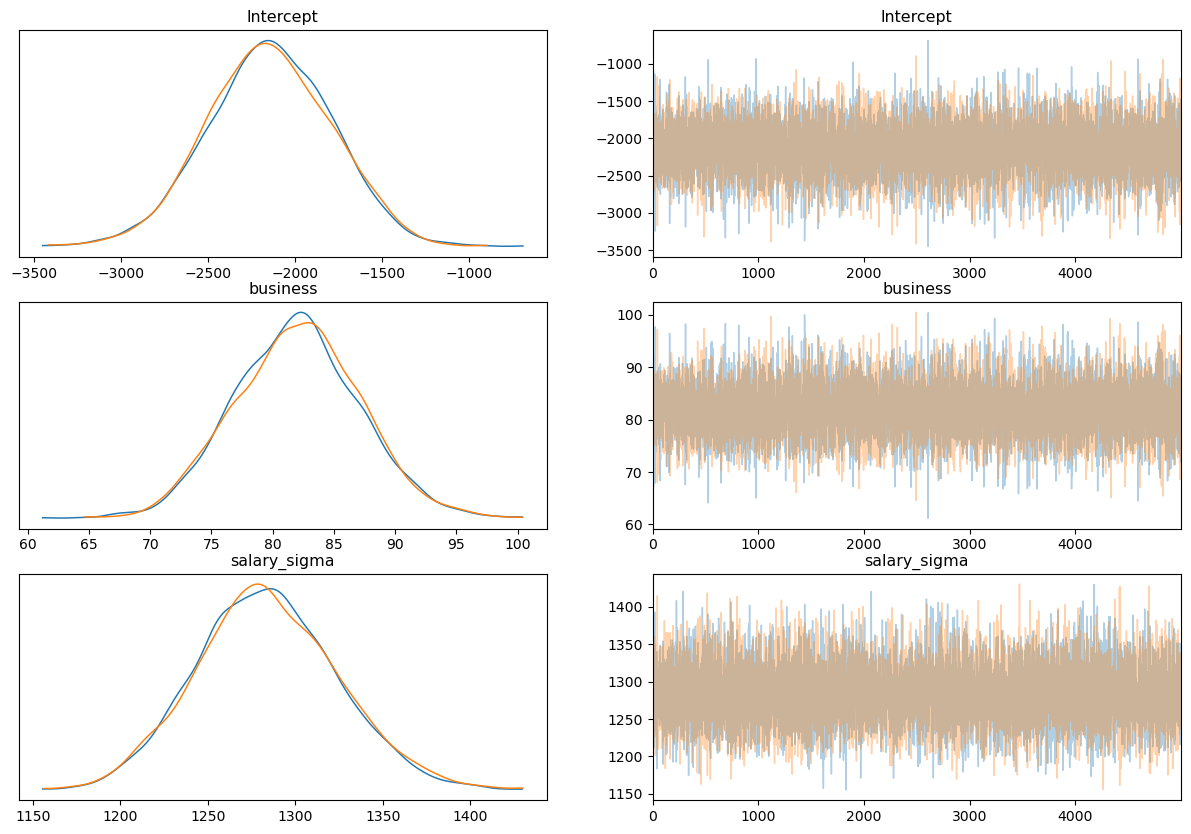

In [96]:
az.plot_trace(results, figsize=(15,10), compact=False)

In [97]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-2145.134,356.513,-2804.202,-1476.367,3.125,2.254,13034.0,7385.0,1.0
business,81.982,5.126,72.404,91.515,0.045,0.032,13158.0,7531.0,1.0
salary_sigma,1283.782,40.391,1204.958,1356.909,0.327,0.232,15290.0,7792.0,1.0


* 在bambi中，如果我们不对先验进行定义，它会自动选择一个比较弱(weakly informative)的先验

* 在下面的代码中，除了模型关系，我们不传入先验定义，可以简单比较二者的差别

In [5]:
model_original = bmb.Model('salary ~ business', 
                  data=df,
                  dropna=True)
model_original

       Formula: salary ~ business
        Family: gaussian
          Link: mu = identity
  Observations: 500
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 3482.214, sigma: 24465.3521)
            business ~ Normal(mu: 0.0, sigma: 351.7742)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1573.1144)

## 补充材料：为什么使用MCMC是必要的  

>我们都知道当后验分布的计算过于复杂时，我们应该选用MCMC来近似后验分布  

>但是在这里后验分布究竟有多复杂呢，这里提供了直接的计算(or提供一些复杂的公式让人知难而退)：  

1. 该线性模型存在三个参数值$(\beta_0, \beta_1, \sigma)$  
	* 那么先验概率则为三者pdf的乘积：  
$$  
 f(\beta_0, \beta_1, \sigma) = f(\beta_0) f(\beta_1) f(\sigma)  
$$  

2. 观测到的数据可以用$\vec{y} = (y_1,y_2,...,y_{n})$来表示  
	* 那么似然函数可以表示为：  
$$  
 L(\beta_0, \beta_1, \sigma | \vec{y}) = f(\vec{y}|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma)  
 $$  

3. 后验分布则可以表示为：  
$$  
\begin{split}  
f(\beta_0,\beta_1,\sigma \; | \; \vec{y})  
 & = \frac{\text{prior} \cdot \text{likelihood}}{ \int \text{prior} \cdot \text{likelihood}} \\  
 & = \frac{f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right]}  
 {\int\int\int f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right] d\beta_0 d\beta_1 d\sigma} \\  
 \end{split}  
 $$  
